In [2]:
# Load duckdb, which lets us efficiently load large files
import duckdb

# Load pandas, which lets us manipulate dataframes
import pandas as pd

# Import jupysql Jupyter extension to create SQL cells
%load_ext sql

# Set configrations on jupysql to directly output data to Pandas and to simplify the output that is printed to the notebook.
%config SqlMagic.autopandas = True

%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

# Allow named parameters (python variables) in SQL cells
%config SqlMagic.named_parameters=True

# Connect jupysql to DuckDB using a SQLAlchemy-style connection string. Either connect to an in memory DuckDB, or a file backed db.
%sql duckdb:///:memory:

/Users/me/jaanli/synthetic-healthcare-data/.venv/lib/python3.12/site-packages/sql/traits.py:20: FutureWarning: named_parameters: boolean values are now deprecated. Value True will be treated as "enabled". 
Please use a valid option: "warn", "enabled", or "disabled". 
For more information, see the docs: https://jupysql.ploomber.io/en/latest/api/configuration.html#named-parameters
  warnings.warn(


In [3]:
%%sql 

COPY (
    SELECT
        PERSON_ID::NUMERIC,
        MCAID_BENE_ID::NUMERIC,
        PERSON_WGHT::NUMERIC,
        AGE_LOW::NUMERIC,
        AGE_HIGH::NUMERIC,
        SEX_IDENT_CD::VARCHAR,
        RACE_CD::VARCHAR,
        MCAID_SBMTTG_ST_CD::VARCHAR,
        STATE_CD::VARCHAR,
        COUNTY_FIPS_CD::VARCHAR,
        ZIP_CD::VARCHAR,
        RSN_ENRLMT_CD::VARCHAR,
        MDCD_ENRLMT_1::NUMERIC,
        MDCD_ENRLMT_2::VARCHAR,
        MDCD_ENRLMT_3::VARCHAR,
        MDCD_ENRLMT_4::VARCHAR,
        MDCD_ENRLMT_5::VARCHAR,
        MDCD_ENRLMT_6::VARCHAR,
        MDCD_ENRLMT_7::VARCHAR,
        MDCD_ENRLMT_8::VARCHAR,
        MDCD_ENRLMT_9::VARCHAR,
        MDCD_ENRLMT_10::VARCHAR,
        MDCD_ENRLMT_11::VARCHAR,
        MDCD_ENRLMT_12::NUMERIC,
        MDCD_MCO_ENRLMT_1::NUMERIC,
        MDCD_MCO_ENRLMT_2::VARCHAR,
        MDCD_MCO_ENRLMT_3::VARCHAR,
        MDCD_MCO_ENRLMT_4::VARCHAR,
        MDCD_MCO_ENRLMT_5::VARCHAR,
        MDCD_MCO_ENRLMT_6::VARCHAR,
        MDCD_MCO_ENRLMT_7::VARCHAR,
        MDCD_MCO_ENRLMT_8::VARCHAR,
        MDCD_MCO_ENRLMT_9::VARCHAR,
        MDCD_MCO_ENRLMT_10::VARCHAR,
        MDCD_MCO_ENRLMT_11::VARCHAR,
        MDCD_MCO_ENRLMT_12::NUMERIC,
        MDCD_CHIP_ENRLMT::NUMERIC,
        RSTRCTD_BNFTS_IND::VARCHAR,
        DUAL_ELGBL_1::NUMERIC,
        DUAL_ELGBL_2::VARCHAR,
        DUAL_ELGBL_3::VARCHAR,
        DUAL_ELGBL_4::VARCHAR,
        DUAL_ELGBL_5::VARCHAR,
        DUAL_ELGBL_6::VARCHAR,
        DUAL_ELGBL_7::VARCHAR,
        DUAL_ELGBL_8::VARCHAR,
        DUAL_ELGBL_9::VARCHAR,
        DUAL_ELGBL_10::VARCHAR,
        DUAL_ELGBL_11::VARCHAR,
        DUAL_ELGBL_12::NUMERIC
    FROM read_csv_auto('/Users/me/data/syh_dr/syhdr_medicaid_person_2016.CSV')
) TO '/Users/me/data/syh_dr/syhdr_medicaid_person_2016.parquet' (FORMAT 'parquet');

,Success


In [4]:
%%sql 

SELECT * FROM '/Users/me/data/syh_dr/syhdr_medicaid_person_2016.parquet'

,"CAST(PERSON_ID AS DECIMAL(18,3))","CAST(MCAID_BENE_ID AS DECIMAL(18,3))","CAST(PERSON_WGHT AS DECIMAL(18,3))","CAST(AGE_LOW AS DECIMAL(18,3))","CAST(AGE_HIGH AS DECIMAL(18,3))",CAST(SEX_IDENT_CD AS VARCHAR),CAST(RACE_CD AS VARCHAR),CAST(MCAID_SBMTTG_ST_CD AS VARCHAR),CAST(STATE_CD AS VARCHAR),CAST(COUNTY_FIPS_CD AS VARCHAR),...,CAST(DUAL_ELGBL_3 AS VARCHAR),CAST(DUAL_ELGBL_4 AS VARCHAR),CAST(DUAL_ELGBL_5 AS VARCHAR),CAST(DUAL_ELGBL_6 AS VARCHAR),CAST(DUAL_ELGBL_7 AS VARCHAR),CAST(DUAL_ELGBL_8 AS VARCHAR),CAST(DUAL_ELGBL_9 AS VARCHAR),CAST(DUAL_ELGBL_10 AS VARCHAR),CAST(DUAL_ELGBL_11 AS VARCHAR),"CAST(DUAL_ELGBL_12 AS DECIMAL(18,3))"
0,500000001.0,511701142.0,8.77,45.0,54.0,M,2,NY,NY,103,...,1,1,1,1,1,1,1,1,1,1.0
1,500000002.0,511589747.0,13.47,65.0,74.0,F,1,AZ,AZ,007,...,1,1,1,1,1,1,1,1,1,1.0
2,500000003.0,511623768.0,12.51,6.0,17.0,F,3,NC,NC,183,...,0,0,0,0,0,0,0,0,0,NaN
3,500000004.0,510156090.0,7.98,18.0,24.0,F,0,SC,SC,019,...,None,0,0,0,0,0,0,0,0,0.0
4,500000005.0,511858221.0,9.20,25.0,34.0,F,0,NY,NY,059,...,0,0,0,0,0,0,0,0,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5771388,505771389.0,513686691.0,11.57,6.0,17.0,F,1,FL,CO,031,...,0,0,0,0,0,0,None,None,None,NaN
5771389,505771390.0,512039932.0,12.52,6.0,17.0,F,1,KS,KS,057,...,0,0,0,0,0,0,0,None,None,NaN
5771390,505771391.0,515359234.0,10.25,25.0,34.0,M,1,IL,IL,073,...,0,0,0,0,0,0,0,0,0,0.0
5771391,505771392.0,511986556.0,11.47,18.0,24.0,M,0,TN,TN,157,...,0,0,0,0,0,None,None,None,None,NaN


In [5]:
df = _

In [6]:
df.head()

,"CAST(PERSON_ID AS DECIMAL(18,3))","CAST(MCAID_BENE_ID AS DECIMAL(18,3))","CAST(PERSON_WGHT AS DECIMAL(18,3))","CAST(AGE_LOW AS DECIMAL(18,3))","CAST(AGE_HIGH AS DECIMAL(18,3))",CAST(SEX_IDENT_CD AS VARCHAR),CAST(RACE_CD AS VARCHAR),CAST(MCAID_SBMTTG_ST_CD AS VARCHAR),CAST(STATE_CD AS VARCHAR),CAST(COUNTY_FIPS_CD AS VARCHAR),...,CAST(DUAL_ELGBL_3 AS VARCHAR),CAST(DUAL_ELGBL_4 AS VARCHAR),CAST(DUAL_ELGBL_5 AS VARCHAR),CAST(DUAL_ELGBL_6 AS VARCHAR),CAST(DUAL_ELGBL_7 AS VARCHAR),CAST(DUAL_ELGBL_8 AS VARCHAR),CAST(DUAL_ELGBL_9 AS VARCHAR),CAST(DUAL_ELGBL_10 AS VARCHAR),CAST(DUAL_ELGBL_11 AS VARCHAR),"CAST(DUAL_ELGBL_12 AS DECIMAL(18,3))"
0,500000001.0,511701142.0,8.77,45.0,54.0,M,2,NY,NY,103,...,1,1,1,1,1,1,1,1,1,1.0
1,500000002.0,511589747.0,13.47,65.0,74.0,F,1,AZ,AZ,007,...,1,1,1,1,1,1,1,1,1,1.0
2,500000003.0,511623768.0,12.51,6.0,17.0,F,3,NC,NC,183,...,0,0,0,0,0,0,0,0,0,NaN
3,500000004.0,510156090.0,7.98,18.0,24.0,F,0,SC,SC,019,...,None,0,0,0,0,0,0,0,0,0.0
4,500000005.0,511858221.0,9.20,25.0,34.0,F,0,NY,NY,059,...,0,0,0,0,0,0,0,0,None,NaN


In [7]:
df.columns

Index(['CAST(PERSON_ID AS DECIMAL(18,3))',
       'CAST(MCAID_BENE_ID AS DECIMAL(18,3))',
       'CAST(PERSON_WGHT AS DECIMAL(18,3))', 'CAST(AGE_LOW AS DECIMAL(18,3))',
       'CAST(AGE_HIGH AS DECIMAL(18,3))', 'CAST(SEX_IDENT_CD AS VARCHAR)',
       'CAST(RACE_CD AS VARCHAR)', 'CAST(MCAID_SBMTTG_ST_CD AS VARCHAR)',
       'CAST(STATE_CD AS VARCHAR)', 'CAST(COUNTY_FIPS_CD AS VARCHAR)',
       'CAST(ZIP_CD AS VARCHAR)', 'CAST(RSN_ENRLMT_CD AS VARCHAR)',
       'CAST(MDCD_ENRLMT_1 AS DECIMAL(18,3))',
       'CAST(MDCD_ENRLMT_2 AS VARCHAR)', 'CAST(MDCD_ENRLMT_3 AS VARCHAR)',
       'CAST(MDCD_ENRLMT_4 AS VARCHAR)', 'CAST(MDCD_ENRLMT_5 AS VARCHAR)',
       'CAST(MDCD_ENRLMT_6 AS VARCHAR)', 'CAST(MDCD_ENRLMT_7 AS VARCHAR)',
       'CAST(MDCD_ENRLMT_8 AS VARCHAR)', 'CAST(MDCD_ENRLMT_9 AS VARCHAR)',
       'CAST(MDCD_ENRLMT_10 AS VARCHAR)', 'CAST(MDCD_ENRLMT_11 AS VARCHAR)',
       'CAST(MDCD_ENRLMT_12 AS DECIMAL(18,3))',
       'CAST(MDCD_MCO_ENRLMT_1 AS DECIMAL(18,3))',
       'CAST(MDCD_MC

<Axes: >

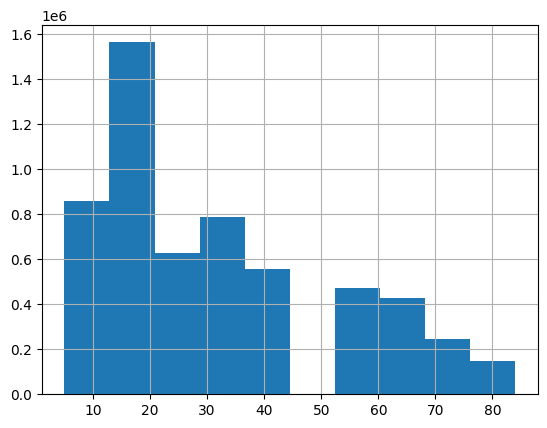

In [8]:
df['CAST(AGE_HIGH AS DECIMAL(18,3))'].hist()

<Axes: >

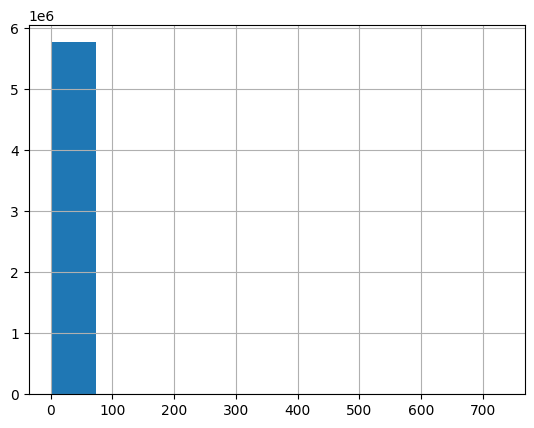

In [9]:
df['CAST(PERSON_WGHT AS DECIMAL(18,3))'].hist()